# Frequent Itemsets

By Linus Östlund and Daniel Workinn

## Implementation

First, read the data from the file and create a list of transactions. We define three methods for the Apriori algorithm, one for generating the candidate sets, one for generating the frequent itemsets and one for generating the association rules.

In [2]:
def import_baskets(path_to_data):
    with open(path_to_data) as f:
        lines = f.readlines()
        # strip() removes the newline character
        # split() returns a list of strings, so convert to int with map()
        baskets = [set(map(int, line.strip().split(sep=' '))) for line in lines]
    return baskets

def get_unique_items(baskets):
    """
    Helper method to get the number of unique items in the baskets.
    """
    return set.union(*baskets)

def get_number_of_baskets(baskets):
    """
    Helper method to get the number of baskets. But you can also use len(baskets) 😂 I walk over the å to get the vatten.
    """
    return len(baskets)

We proceed with loading all baskets into a list of sets, where each set is a basket. We also create a dictionary that maps each item to the baskets it is in.

In [3]:
# NOTE: this could differ depending on what OS you are using (I'm on a Mac M1)
path_to_data = '../data/baskets.dat'

baskets = import_baskets(path_to_data)

print(f'Number of unique items: {len(get_unique_items(baskets))}')
print(f'Number of baskets: {len(baskets)}')

Number of unique items: 870
Number of baskets: 100000


Here are all items with their corresponding baskets.

In [4]:
# get item and basket dictionary
def item_and_basket_dictionary(baskets):
    """
    Returns a dictionary with each each item as a key, and a list of all basket it appears in as a value.
    """
    # set up keys as all unique items
    keys = get_unique_items(baskets)

    # values will be lists of basket's number where they occur
    values = [[] for _ in range(len(get_unique_items(baskets)))]

    items = dict(zip(keys, values))

    # populate the dictionary
    for i, basket in enumerate(baskets):
        for item in basket:
            items[item].append(i)
    return items

In [5]:
import numpy as np
import pandas as pd
# a dataframe with the item as the index and the baskets as the values

# https://pandas.pydata.org/docs/user_guide/basics.html OPTIMERA!!!!!!!!
df = pd.DataFrame(columns=get_unique_items(baskets), index=np.arange(len(baskets)))
df = df.fillna(False)
for i, basket in enumerate(baskets):
    for item in basket:
        #print(f'item: {item}, basket: {i}')
        df.loc[i, item] = True

In [6]:
df

,0,1,2,3,4,5,6,7,8,10,...,988,989,990,991,992,994,995,997,998,999
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
99998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
print(f"{df.memory_usage(deep=True).sum() / 1000**2} megabytes")

89.913576 megabytes


In [10]:
# calculate number of true in each column
singletons = df.sum(axis=0).to_dict()
print(f'Number of singletons: {len(singletons)}')


Number of singletons: 870


In [11]:
singletons

{0: 594,
 1: 1535,
 2: 673,
 3: 531,
 4: 1394,
 5: 1094,
 6: 2149,
 7: 997,
 8: 3090,
 10: 1351,
 11: 525,
 12: 3415,
 13: 35,
 14: 197,
 15: 458,
 16: 150,
 17: 1683,
 18: 813,
 19: 121,
 20: 40,
 21: 2666,
 22: 397,
 23: 128,
 24: 191,
 25: 1395,
 26: 527,
 27: 2165,
 28: 1454,
 29: 171,
 31: 1666,
 32: 4248,
 33: 1460,
 34: 56,
 35: 1984,
 36: 528,
 37: 1249,
 38: 2402,
 39: 4258,
 40: 457,
 41: 1353,
 42: 119,
 43: 1721,
 44: 903,
 45: 1728,
 46: 543,
 47: 175,
 48: 2472,
 49: 137,
 51: 1612,
 52: 1983,
 53: 535,
 54: 2595,
 55: 1959,
 56: 114,
 57: 2743,
 58: 1330,
 59: 312,
 62: 110,
 64: 319,
 66: 888,
 67: 316,
 68: 1601,
 69: 2370,
 70: 2411,
 71: 3507,
 72: 2852,
 73: 2179,
 74: 58,
 75: 3151,
 78: 2471,
 80: 826,
 81: 270,
 82: 674,
 83: 181,
 85: 1555,
 86: 229,
 88: 303,
 89: 211,
 90: 1875,
 91: 116,
 93: 2777,
 94: 1201,
 95: 841,
 96: 975,
 97: 1466,
 98: 486,
 100: 1749,
 101: 329,
 102: 109,
 103: 327,
 104: 1158,
 105: 1100,
 108: 940,
 110: 1801,
 111: 1171,
 112: 2

In [7]:
threshold = 0.01
freq_singletons = {k: v for k, v in singletons.items() if v / len(baskets) >= threshold}
print(f'Number of significant singletons: {len(freq_singletons)}')

Number of significant singletons: 375


In [13]:
def get_frequent_items_table(baskets, frequent_items, amount_of_unique_items=1000):
    """
    Returns a table of frequent items, where each row is a frequent item and each column is a basket.
    frequent_items is a dictionary with the frequent singletons as keys and the number of baskets they occur in as values.
    """
    # NOTE there are 870 uniqe items assigned to integers [0, 1000]. This step is usually done by as a first step in the apriori alogoritm.
    frequent_items_table = np.zeros(amount_of_unique_items, dtype=int) 
    # assign 'm' as a unique values, used to mark the frequent items
    m = 0
    # identify all frequent items
    # NOTE why dont we just use boolean values, is there a reason to use integers?
    for item in frequent_items:
        frequent_items_table[item] = m
        m += 1
    return frequent_items_table

In [14]:
from itertools import combinations

def get_frequent_item_from_basket(basket, frequent_items_table):
    """
    [HELPER FUNCTION] Return the frequent items in a basket.
    """
    return [item for item in basket if frequent_items_table[item] != 0]

def generate_all_combinations(items, k=2):
    """
    [HELPER FUNCTION] Generate all pairs of frequent items in a basket.
    """
    return [frozenset(pair) for pair in combinations(items, k)]

def find_candidate_pairs(baskets, frequent_items_table, k=2):
    """
    Find all candidate pairs of frequent items.
    """
    candidate_pairs = {}
    for basket in baskets:
        freq_items_in_basket = get_frequent_item_from_basket(basket, frequent_items_table)
        basket_pairs = generate_all_combinations(freq_items_in_basket, k=k)
        for pair in basket_pairs:
            if pair not in candidate_pairs:
                candidate_pairs[pair] = 1
            else:
                candidate_pairs[pair] += 1
    return candidate_pairs


def filter_candidate_pairs(candidates, threshold):
    """
    Filter out all candidate pairs that do not meet the threshold.
    """
    #return dict(filter(lambda x: x[1] >= threshold, candidate_pairs.items())) # TODO är filter bättre?
    return {pair: freq for pair, freq in candidates.items() if freq >= threshold*len(candidates)}

In [10]:
frequent_items_table = get_frequent_items_table(baskets, freq_singletons.keys())
candidate_pairs = find_candidate_pairs(baskets, frequent_items_table)
freq_pairs = filter_candidate_pairs(candidate_pairs, threshold=0.01*len(candidate_pairs))

print(f'Number of candidate pairs: {len(candidate_pairs)}')
print(f'Number of filtered candidate pairs: {len(freq_pairs)}')

Number of candidate pairs: 69751
Number of filtered candidate pairs: 0


In [11]:
freq_pairs_items = frozenset.union(*freq_pairs)
print(f'Number of unique items in frequent pairs: {len(freq_pairs_items)}')

frequent_items_table_pairs = get_frequent_items_table(baskets, freq_pairs_items)
candidate_triples = find_candidate_pairs(baskets, frequent_items_table_pairs, k=3)
freq_triples = filter_candidate_pairs(candidate_triples, threshold=0.01*len(candidate_triples))

print(f'Number of candidate triples: {len(candidate_triples)}')
print(f'Number of filtered candidate triples: {len(freq_triples)}')


TypeError: unbound method frozenset.union() needs an argument

In [ ]:
freq_triples_items = frozenset.union(*freq_triples)
print(f'Number of unique items in frequent triples: {len(freq_triples_items)}')

frequent_items_table_triples = get_frequent_items_table(baskets, freq_triples_items)
candidate_quadruples = find_candidate_pairs(baskets, frequent_items_table_triples, k=4)
freq_quadruples = filter_candidate_pairs(candidate_quadruples, threshold=0.01*len(candidate_quadruples))

print(f'Number of candidate quadruples: {len(candidate_quadruples)}')
print(f'Number of filtered candidate quadruples: {len(freq_quadruples)}')

Number of unique items in frequent triples: 43
Number of candidate quadruples: 17210
Number of filtered candidate quadruples: 7


In [ ]:
freq_quadruples_items = frozenset.union(*freq_quadruples)
print(f'Number of unique items in frequent quadruples: {len(freq_quadruples_items)}')

frequent_items_table_quadruples = get_frequent_items_table(baskets, freq_quadruples_items)
candidate_quintuples = find_candidate_pairs(baskets, frequent_items_table_quadruples, k=5)
freq_quintuples = filter_candidate_pairs(candidate_quintuples, threshold=0.01*len(candidate_quintuples))

print(f'Number of candidate quintuples: {len(candidate_quintuples)}')
print(f'Number of filtered candidate quintuples: {len(freq_quintuples)}')

Number of unique items in frequent quadruples: 23
Number of candidate quintuples: 1744
Number of filtered candidate quintuples: 13


In [ ]:
# SANDBOX
freq_tons = frozenset([item for item, freq in singletons.items() if freq / len(baskets) <= threshold])

freq_items_table = get_frequent_items_table(baskets, freq_tons)
candidate_pairs = find_candidate_pairs(baskets, freq_items_table, k=1)
#freq_pairs = filter_candidate_pairs(candidate_pairs, threshold=0.01*len(candidate_pairs))

{frozenset({164}): 744,
 frozenset({328}): 663,
 frozenset({730}): 602,
 frozenset({124}): 294,
 frozenset({712}): 845,
 frozenset({759}): 788,
 frozenset({249}): 615,
 frozenset({954}): 366,
 frozenset({352}): 902,
 frozenset({262}): 660,
 frozenset({15}): 458,
 frozenset({320}): 540,
 frozenset({26}): 527,
 frozenset({7}): 997,
 frozenset({849}): 459,
 frozenset({979}): 132,
 frozenset({272}): 659,
 frozenset({300}): 582,
 frozenset({333}): 483,
 frozenset({855}): 939,
 frozenset({256}): 785,
 frozenset({193}): 925,
 frozenset({512}): 611,
 frozenset({483}): 439,
 frozenset({939}): 342,
 frozenset({626}): 874,
 frozenset({277}): 982,
 frozenset({374}): 490,
 frozenset({474}): 815,
 frozenset({327}): 662,
 frozenset({839}): 854,
 frozenset({698}): 236,
 frozenset({699}): 353,
 frozenset({801}): 835,
 frozenset({938}): 766,
 frozenset({781}): 419,
 frozenset({845}): 585,
 frozenset({101}): 329,
 frozenset({903}): 711,
 frozenset({842}): 752,
 frozenset({657}): 506,
 frozenset({969}): 8

In [16]:
tons = {'single': 1, 'double': 2, 'triple': 3, 'quadruple': 4, 'quintuple': 5, 'sextuple': 6, 'septuple': 7, 'octuple': 8, 'nonuple': 9, 'decuple': 10}

# this loop requires freq_singletons to function :) 
threshold = 0.01


for ton, k in tons.items():
    print(f'Producing {ton}tons...')
    # unnecessary to produce frequent items for k=1???
    if ton == 'single':
        # dont have to generate all pairs, but can just use the frequent items since its a dictionary
        candidates = singletons
        filtered_candidates = filter_candidate_pairs(candidates, threshold=threshold)
        freq_tons = frozenset(filtered_candidates.keys())
    else:
        # if not singleton, generate all pairs with frozen sets as keys
        if ton == 'double':
            # special case for doubletons, since singletons are just keys in a dictionary
            freq_tons = frozenset(filtered_candidates.keys())
        else:
            # for all other tons, use the union of the previous ton
            freq_tons = frozenset.union(*filtered_candidates.keys())
        frequent_items_table = get_frequent_items_table(baskets, freq_tons)
        candidates = find_candidate_pairs(baskets, frequent_items_table, k=k) # TODO find_candidate_k_tuplets
        filtered_candidates = filter_candidate_pairs(candidates, threshold=threshold)
    if len(filtered_candidates) == 0:
        print(f'No more {ton}tons found. Stopping at {k}-tuples.')
        break
    else:
        print(f'\tNumber of unique items in frequent {ton}tons: {len(freq_tons)}')
        print(f'\tNumber of filtered candidate in frequent {ton}tons: {len(filtered_candidates)}\n')
       # break # safety!!!! remove if it works



Producing singletons...
	Number of unique items in frequent singletons: 867
	Number of filtered candidate in frequent singletons: 867

Producing doubletons...
No more doubletons found. Stopping at 2-tuples.


In [56]:
freq_quintuples_items = frozenset.union(*freq_quintuples)
print(f'Number of unique items in frequent quintuples: {len(freq_quintuples_items)}')

frequent_items_table_quintuples = get_frequent_items_table(baskets, freq_quintuples_items)
candidate_sextuples = find_candidate_pairs(baskets, frequent_items_table_quintuples, k=6)
freq_sextuples = filter_candidate_pairs(candidate_sextuples, threshold=0.01*len(candidate_sextuples))

print(f'Number of candidate sextuples: {len(candidate_sextuples)}')
print(f'Number of filtered candidate sextuples: {len(freq_sextuples)}')

Number of unique items in frequent quintuples: 18
Number of candidate sextuples: 415
Number of filtered candidate sextuples: 40


To get some statistics of the data, I turned the list of items and how many baskets they were found in into a Panda's dataframe and used the `describe()` method.

In [20]:
import numpy as np
import pandas as pd

# items is a dictionary with keys as items and values as lists of basket numbers
items = item_and_basket_dictionary(baskets)

# the support for all singletons is stored in 'singletons'
# TODO this should be a dictionary or list of tuples (item, len(value)), where 'value' is the list of baskets where the item occurs
singletons = np.array(list((map(len, items.values()))))
df = pd.DataFrame(singletons, columns=['support'])
df['item'] = df.index # TODO unnecessary assignment?
df.describe()

,support,item
count,870.000000,870.000000
mean,1161.181609,434.500000
std,1125.223572,251.291663
min,1.000000,0.000000
25%,363.500000,217.250000
50%,816.500000,434.500000
75%,1573.500000,651.750000
max,7828.000000,869.000000


We also plot the support of each item (how many baskets it is in) in a histogram, a boxplot and a barplot to see which items are most frequent.

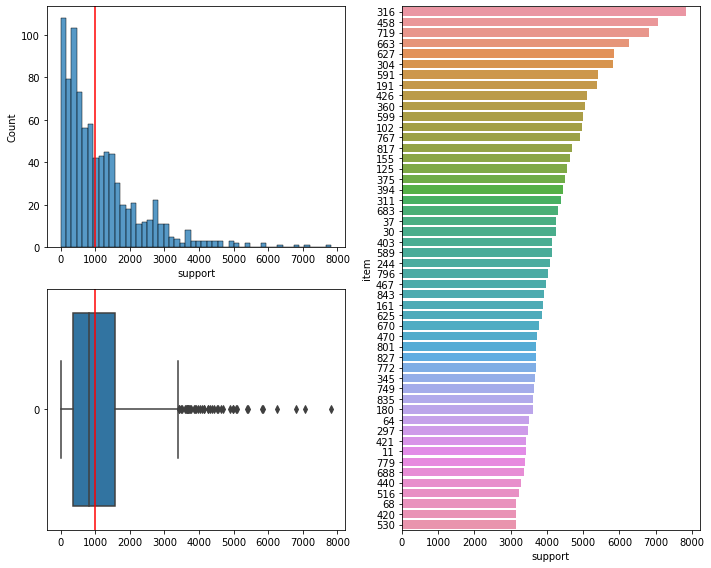

In [310]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

fig = plt.figure(figsize=(10, 8))

ax1= fig.add_subplot(2,2,1)
ax2= fig.add_subplot(2,2,3)
ax3= fig.add_subplot(1,2,2)

# set s and threshold
s = 0.01
threshold = s * get_number_of_baskets(baskets)

sns.histplot(data=df['support'], bins=50, ax=ax1)
ax1.axvline(x=threshold, color='r')
sns.boxplot(data=df['support'], orient='h', ax=ax2)
ax2.axvline(x=threshold, color='r')
barplot_max_no_of_baskets = 50
sns.barplot(data=df.sort_values(by='support', ascending=False).head(barplot_max_no_of_baskets),
            x='support', 
            y='item', 
            orient='h',
            order=df.sort_values(by='support', ascending=False).item.head(barplot_max_no_of_baskets),
            ax=ax3
            )

plt.tight_layout()
plt.show()


## Monotonicity of Itemsets

According to the paper and ch 6 of the course literature, the effectiveness of the Apriori algorithm depends on the monotonicity of the itemsets. 

> **Definition**: If a set $I$ of items is frequent, then so is the powerset of $I$ are also frequent (remember, the **powerset of $I$ is the set of all subsets of $I$**)

For example, if the itemset $I = \{1, 2, 3\}$ is frequent, then so are *all* subsets, $\mathscr{P}(I) = \{\{1\}, \{2\}, \{3\}, \{1, 2\}, \{1, 3\}, \{3, 2\}\}$, of $I$.
In section 6.2.5 of the course literature, there is a naive algorithm for finding frequent itemsets described. The algorithm is as follows:

In [311]:
def count_all_pairs_naive(baskets):
    """
    Count the number of pairs of items that occur together in a basket.
    """
    pairs = {}
    for basket in baskets:
        for item1 in basket:
            for item2 in basket:
                if item1 < item2: # TODO check if this is correct, not sure
                    pairs[(item1, item2)] = pairs.get((item1, item2), 0) + 1
    return pairs

tuples = count_all_pairs_naive(baskets)


For the dataset included in the lab, the algorithm takes 2.5 seconds to run. The algorithm is not very efficient, as it has to check every possible subset of every itemset. The Apriori algorithm is much more efficient, as it only checks the subsets of the itemsets that are frequent. The Apriori algorithm is described in section 6.2.6 of the course literature, but also in the article. 

In [312]:
def get_support_for_all_pairs(items):
    return dict(map(lambda x: (x[0], len(x[1])), items.items()))

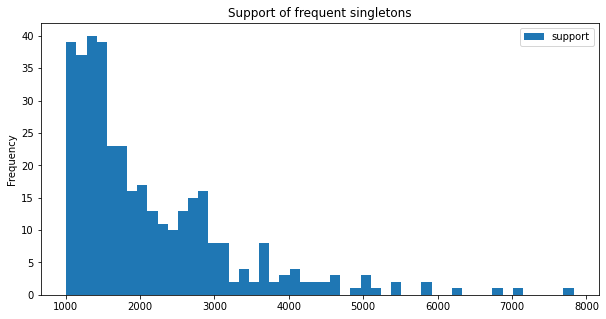

In [313]:
# first step of the aprori algorithm is to count the number singletons, which we already did (?)
# TODO here I overwrite the previous defintion of 'singletons', and I believe this is better.
singletons = get_support_for_all_pairs(items)

# between the passes of A-Priori, we will store the frequent singletons in 'frequent_singletons'
df_singletons = pd.DataFrame.from_dict(singletons, orient='index', columns=['support'])

# we can now filter out all singletons that do not meet the threshold
df_freq_singletons = df_singletons[df_singletons['support'] >= s * get_number_of_baskets(baskets)]

# make a histplot of the support of the singletons above the threshold
df_freq_singletons.plot(kind='hist', bins=50, figsize=(10, 5)).set_title('Support of frequent singletons');

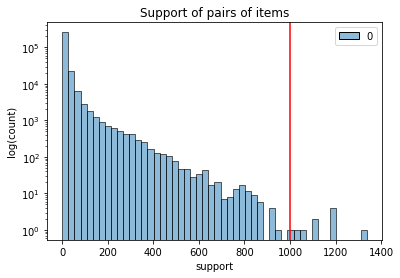

In [314]:
# plot the distribution of the support of the pairs

# TODO Threshold is off for pairs #FML
plot = sns.histplot(data=tuples.values(), bins=50)
plot.set(xlabel='support', ylabel='log(count)', title='Support of pairs of items')
plot.set_yscale('log')

# add a red vertical line at the threshold
plot.axvline(x=threshold, color='r')

For the second pass of the Apriori algorithm, we need to generate candidate itemsets. 

> **From course literature (p.226):** During the second pass, we count all the pairs that *consists of two frequent items*. We call this table *frequent-items table*.

We then check if the pair is frequent, and if it is, we add it to the set of frequent itemsets.
The algorithm for generating candidate itemsets is as follows:

In [315]:
freq_singletons = list(zip(df_freq_singletons.index, df_freq_singletons['support']))

In [316]:
def get_frequent_items_table(baskets, freq_singletons):
    """
    Returns a table of frequent items, where each row is a frequent item and each column is a basket.
    """
    num_of_items = len(get_unique_items(baskets))
    frequent_items_table = np.zeros(1000, dtype=int)

    # assign 'm' as a unique values, used to mark the frequent items
    m = 0

    # identify all frequent items
    for item, freq in freq_singletons:
        frequent_items_table[item] = m
        m += 1
    return frequent_items_table

Now we do the 2nd pass of the Apriori algorithm, where we check if the candidate itemsets are frequent.

From the course literature, page 226:

1. For each basket, look in the frequent-items table to see which of its items are frequent.
2. In a double loop, generate all pairs of frequint items in that basket.
3. For each such pair, add one to its count in the data structure used to store counts.

To generate all pairs of frequent items in a basket, we use the `combinations` function from the `itertools` library. We use `frozensets` since they are a hashable type, and can be used as keys in a dictionary.

In [317]:
from itertools import combinations

def get_frequent_item_from_basket(basket, frequent_items_table):
    """
    [HELPER FUNCTION] Return the frequent items in a basket.
    """
    return [item for item in basket if frequent_items_table[item] != 0]

def generate_all_combinations(items, k=2):
    """
    [HELPER FUNCTION] Generate all pairs of frequent items in a basket.
    """
    return [frozenset(pair) for pair in combinations(items, k)]

def find_candidate_pairs(baskets, frequent_items_table, k=2):
    """
    Find all candidate pairs of frequent items.
    """
    candidate_pairs = {}
    for basket in baskets:
        freq_items_in_basket = get_frequent_item_from_basket(basket, frequent_items_table)
        basket_pairs = generate_all_combinations(freq_items_in_basket, k=k)
        for pair in basket_pairs:
            if pair not in candidate_pairs:
                candidate_pairs[pair] = 1
            else:
                candidate_pairs[pair] += 1
    return candidate_pairs


def filter_candidate_pairs(candidate_pairs, threshold):
    """
    Filter out all candidate pairs that do not meet the threshold.
    """
    #return dict(filter(lambda x: x[1] >= threshold, candidate_pairs.items())) # TODO är filter bättre?
    return {pair: freq for pair, freq in candidate_pairs.items() if freq >= threshold}

Here I try to filter all the frequent itemsets that have a support of 0.01 or higher. I do this by creating a new dictionary where I only add the frequent itemsets that have a support of 0.01 or higher. I then sort the dictionary by the support of the itemsets.

In [318]:
frequent_items_table = get_frequent_items_table(baskets, freq_singletons)
candidate_pairs = find_candidate_pairs(baskets, frequent_items_table)

# TODO uncertain if this is correct
threshold = int(0.01 * len(candidate_pairs))
print(f'Number of candidate pairs: {len(candidate_pairs)}, and threshold: {threshold}')

frequent_candidate_pairs = filter_candidate_pairs(candidate_pairs, threshold)

Number of candidate pairs: 69751, and threshold: 697


WHEN YOU LOOK CLOSE ENOUGH EVERYTHING IS A HEATMAP

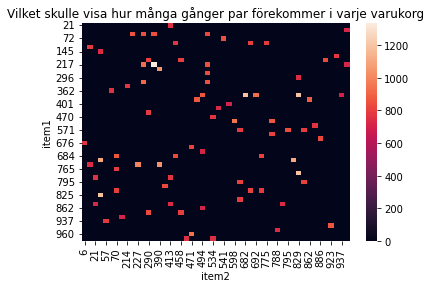

In [319]:
%matplotlib inline

# 'unboxed' is the dictionary with frozensets, unwrapped into a matrix
unboxed = []
for item in frequent_candidate_pairs.items():
    x, y = item[0]
    count = item[1]
    unboxed.append((x, y, count))

# Hettkarta över antal förekomster av par
df = pd.DataFrame(unboxed, columns=['item1', 'item2', 'support'])
sns.heatmap(df.pivot_table(index='item1', columns='item2', values='support').fillna(0)).set_title('Vilket skulle visa hur många gånger par förekommer i varje varukorg');

## Apriori Pipeline

![Apriori pipeline](../imgs/apriori_pipeline.jpeg)

I think next step is to implement the Apriori algorithm in Spark. I think it would be interesting to see how the performance of the algorithm changes when we use Spark instead of Python.
No but make a pipeline that returns most frequent pairs as described in the image.

In [320]:
# construct a pipeline as described in the course material
# TODO perhaps makes more sense to make it a class?
# TODO namnge first pass och second pass tydligt i koden...
def apriori_pipeline(items, basket, s=0.01, pipeline_length=2):
    items = item_and_basket_dictionary(baskets)
    singletons = get_support_for_all_pairs(items) # TODO fult namn och fel att ha i Pajplajnen? Borde returnera en df direkt
    df_singletons = pd.DataFrame.from_dict(singletons, orient='index', columns=['support'])
    df_freq_singletons = df_singletons[df_singletons['support'] >= s * get_number_of_baskets(baskets)]
    freq_singletons = list(zip(df_freq_singletons.index, df_freq_singletons['support']))
    frequent_items_table = get_frequent_items_table(baskets, freq_singletons)
    candidate_pairs = find_candidate_pairs(baskets, frequent_items_table)
    threshold = int(s * len(candidate_pairs))
    frequent_candidate_pairs = filter_candidate_pairs(candidate_pairs, threshold)
    return frequent_candidate_pairs

In [321]:
apriori_pipeline(items, baskets)

{frozenset({448, 538}): 723,
 frozenset({39, 704}): 1107,
 frozenset({704, 825}): 1102,
 frozenset({39, 825}): 1187,
 frozenset({529, 782}): 862,
 frozenset({227, 390}): 1049,
 frozenset({623, 795}): 805,
 frozenset({795, 853}): 806,
 frozenset({571, 795}): 838,
 frozenset({175, 910}): 713,
 frozenset({623, 853}): 791,
 frozenset({571, 623}): 783,
 frozenset({571, 853}): 793,
 frozenset({392, 862}): 881,
 frozenset({411, 803}): 826,
 frozenset({290, 458}): 786,
 frozenset({208, 290}): 803,
 frozenset({290, 888}): 826,
 frozenset({208, 458}): 796,
 frozenset({458, 888}): 796,
 frozenset({208, 888}): 829,
 frozenset({192, 935}): 775,
 frozenset({471, 678}): 810,
 frozenset({789, 829}): 1194,
 frozenset({296, 829}): 736,
 frozenset({392, 489}): 866,
 frozenset({368, 829}): 1194,
 frozenset({72, 541}): 846,
 frozenset({368, 937}): 701,
 frozenset({6, 676}): 769,
 frozenset({21, 857}): 729,
 frozenset({21, 793}): 765,
 frozenset({793, 857}): 734,
 frozenset({598, 782}): 800,
 frozenset({529